$\def\Arc#1{\buildrel\frown\over{#1}}$
$\def\Degrees{^{\tt o}}$
$\def\Line#1{\buildrel\longleftrightarrow\over{#1}}$
$\def\Segment#1{\overline{#1}}$

# Chapter 16 - Circles and Measures

## Definition - Central Angle

> An angle is a **central angle** if and only if its vertex is at the center of a circle.

## Definition - Arc

> If $\angle ACB$ is a central angle and points $A$ and $B$ lie on the circle, then the **minor arc** $\Arc{AB}$ is the union of $A$, $B$, and all points of the circle which lie in the interior of $\angle ABC$.  The **major arc** $\Arc{AB}$ is the union of $A$, $B$, and all points of the circle which lie in the exterior of $\angle ABC$.  The points $A$ and $B$ are called the **endpoints** of the arc.

The authors introduce more notation here to distinguish which flavor $\Arc{AB}$ refers to:

1. Major arcs will *always* be written as $\Arc{AXB}$ where $X$ is some point on the arc but not an endpoint of the arc;
2. Minor arcs will *generally* be written as $\Arc{AB}$ but may be written as $\Arc{AYB}$ in some cases where $Y$ is some point on the arc but not an endpoint of the arc.

## Definition - Semicircle

> Given central angle $\angle ACB$, $\Arc{AB}$ is a **semicircle** if and only if $\angle ACB$ is a straight angle.  *A semicircle is considered a **minor** arc*.

## Definition - Intercepted Arc

> An angle **intercepts** an arc if and only if:
>
> 1. Each side of the angle contains an endpoint of the arc;
> 2. All other points of the arc are in the interior of the angle.

## Definition - Degree Measure

> The **degree measure** of a minor arc is equal to the degree measure of the central angle which intercepts the arc.  The **degree measure** of a major arc is equal to $360\Degrees$ minus the degree measure of the corresponding minor arc.  The measure of $\Arc{AB}$ is written "$m\!\Arc{AB}$".

### Theorem 16-1 - Measure of Semicircle

> The measure of a semicircle is $180\Degrees$.

### Corollary 16-1.1 - Measure of Circle

> The measure of a circle is $360\Degrees$.

### Theorem 16-2 - Arc Addition Theorem

> (Arc Addition Theorem.)  If $X$ is a point of $\Arc{AXB}$, then $m\!\Arc{AXB} = m\!\Arc{AX} + m\!\Arc{XB}.$

## Definition - Congruent Arcs

> In the same circle or congruent circles, two **arcs are congruent** if and only if they have the same degree measure.  If $\Arc{AB}$ is congruent to $\Arc{EF}$, then it is written $\Arc{AB} \,\cong\, \Arc{EF}.$

## Definition - Arc Midpoint

> A **midpoint** of an arc is the point of the arc which divides the arc into two congruent arcs.

## Definition - Corresponding Chords

> The **chord corresponding to an arc** is the chord determined by the endpoints of the arc.

### Theorem 16-3 - Congruent Arcs and Chords

> In the same circle or in congruent circles, two minor (or major) arcs are congruent if and only if their corresponding chords are congruent.

## Definition - Inscribed Angle

> An **inscribed angle** is an angle determined by the union of two chords intersecting on a circle.  The sides of the inscribed angle contain the chords and the vertex of the inscribed angle is the point of intersection.

### Theorem 16-4 - Inscribed Angle Measure

> The **measure of an inscribed angle** is equal to one half the measure of its intercepted arc.

It is remarkable how much mileage one gets from this result.

### Corollary 16-4.1

> Any angle inscribed in a semicircle is a right angle (because the intercepted arc is $180\Degrees$).

### Corollary 16-4.2

> In the same circle or in congruent circles, any two inscribed angles which intercept congruent arcs are congruent.

### Theorem 16-5 - Chord and Tangent

> The angle formed by a chord and a tangent which intersects that chord is equal to one half the measure of its intercepted arc.

This is the limit of what happens as you slide the vertex of an inscribed angle around the circle until it hits an arc endpoint.  Inscribed angle *always* remains at half the arc; fascinating.  The next four puzzles may be proven using Theorem 16-4.  First, some pictures to aid visualization.

### Program - Intercepted Arcs



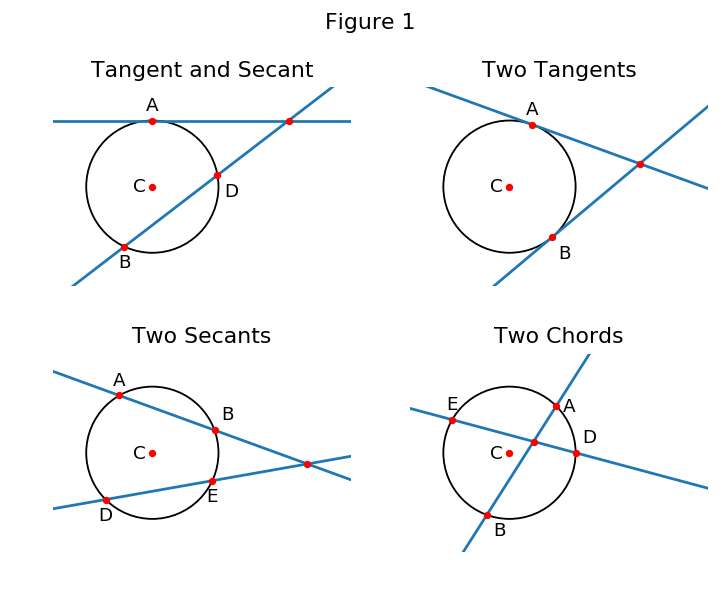

In [1]:
#%
#% Graphical aids for the inscribed angle problems.
#%
#% This SciPy software is too fun for words but these programs are growing
#% large.  Use multiple cells?  But then the notebook is all about coding
#% rather than geometry.  Hmm...  Wouldn't it be great if Jupyter included
#% a Source button like the matplotlib documentation?  Then one would just
#% see the pictures unless they were curious about code and clicked Source...
#%
#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+

#% Setup the "backend" for ipython + jupyter; see
#% https://ipython.readthedocs.io/en/stable/interactive/plotting.html#id1

%matplotlib inline

#% This python 3.6.5 package reads rc file but global rcParams never 
#% receives it!  Workaround until better package is installed.

import matplotlib as mpl
mpl.rc_file_defaults()  #% Rereads ~/.matplotlib/matplotlibrc.

#% Continue with normal programming.  See Reference for matplotlib artists,
#% https://matplotlib.org/gallery/shapes_and_collections/artist_reference.html.

import numpy as np
from numpy.polynomial import Polynomial as Poly

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

debug    = False     #% Set True for development or testing.
C        = [0., 0.]  #% Center of all circles.
r        = 2.        #% Radius of all circles.

#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+
#%
#% Circles.

def add_circle(axes):
    circle = patches.Circle(C, r, facecolor='#00000000', edgecolor='black')
    axes.add_patch(circle)
    add_dot(axes, C)
    add_text(axes, C, 'C', 'right', 'center')
    
#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+
#%
#% Dots.

def add_dot(axes, xy, marker='ro'):
    axes.plot(*xy, marker, markersize=3)

#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+
#%
#% Lines.

def add_lines(axes, pandas, xlabel=None, precision=6):
    """
    Draw and annotate lines on the given axes.
    
    This method adds one or lines to a subplot given the angles at which they
    intersect the subplot's circle.
    
    Parameters
    ----------
        axes: a matplotlib.axes.Axes
            The axes to receive lines.
        lines: array_like -- FIX THIS DOC --
            A list of lines specified in terms of where they intersect the
            plot's circle.  Each line is represented by a sublist of one 
            or two scalar angles specified in degrees measured counter-
            clockwise from 0 at (r, 0) to 360 where r is circle radius.
            A sublist with one angle represents a tangent line; two angles
            implies a secant.
        labels: array_like
            Optional list of labels to apply to each point in lines. Labels
            should have same shape, or structure, as lines.  For example,
            if lines == [[90], [10,-40]], labels could be (('A',), ('B','C')).
            TODO: Put labels with their lines, it is less confusing, less
            error prone.
    
    Returns
    -------
        something: or not
    """

    lol = []  # List of lines.
    for line in pandas:
        
        # Convert angle(s) to point(s) and gather in xy.
        angles, labels, xy = [], [], []
        for (angle, label) in line:
            radians = np.pi * angle / 180.
            point = r * np.array([np.cos(radians), np.sin(radians)])
            point = np.around(point, precision)
            if angle < 0: angle += 360
            angles.append(angle)
            labels.append(label)
            xy.append(point)  # These lie on the circle.
 
        ####%####
        #
        # Each line in lol is represented by the following items:
        #
        #  * its angles for each point
        #  * its labels, each point can have corresponding label
        #  * its points, an np.array of one (tangent) or two points;
        #  * its unit vector, always points "towards right" or up
        #  * its equation as a numpy Polynomial fx = y where:
        #     (y - y0) = m*(x - x0) or y = (y0 - m*x0) + m*x.
        #
        # For vertical lines, the polynomial is replaced by a single
        # scalar, the line's value of x0.
        #
        x0, y0 = xy[0]
        def lol_append(dx, dy):
            
            # Unit vector points up or right.
            unit = np.array([dx, dy]) / np.sqrt(dx**2 + dy**2)
            if dx == 0: unit[1] = np.abs(unit[1]) # Vertical, point up.
            elif dx < 0: unit = -unit  # Point right.
            unit = np.around(unit, precision)
            
            # fx is equation of line or, if vertical line, value of x0.
            if dx == 0:
                fx = x0
            else:
                m = dy / dx  # Slope of line.
                fx = Poly([y0 - m * x0, m])
            
            # Append another line structure to list.
            #nonlocal xy  # Defeats a "not initialized" warning.
            lol.append([angles, labels, np.array(xy), unit, fx])

        # Check if this is a tangent line.
        if len(xy) == 1:
            dx, dy = -y0, x0  # Parallel to line, not radius.
            lol_append(dx, dy)
                
        # Check if this is a secant line.
        elif len(xy) == 2:
            dx, dy = xy[1][0] - xy[0][0], xy[1][1] - xy[0][1]
            lol_append(dx, dy)
                
        # Handle bad input.
        else:
            raise 'Line specification must include one or two angles.'

    #####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+
    #
    #  Prepare return values: (points, units, intersections)...
    #
    #  Points are ... (finish me...)
    #
    #  Intersections are in strictly upper triangular nexi so that,
    #  if you passed in N lines, the intersection of line n and
    #  line n + k is at nexi[n, n+k] where 0 <= n < n + k < N.
    #  If line n and line n+k are parallel, there is no intersection
    #  and nexi[n, n+k] contains np.array([nan, nan]) which may
    #  be tested for with the expression np.isnan(nexi[i,j]).any().
    #  Maybe.
    #
    units = []
    nexi = np.full((len(lol), len(lol), 2), np.nan)
    
    # Find intersection for each pair of input lines.
    for i in range(len(lol)):
        points1, unit1, fx1 = lol[i][2:]
        for j in range(i + 1, len(lol)):
            points2, unit2, fx2 = lol[j][2:]
            if np.array_equal(unit1, unit2):
                continue  # Lines are parallel, leave NaN as intersection.
            if isinstance(fx1, Poly) and not isinstance(fx2, Poly):
                # Line 2 is vertical, fx2 is x0.
                nexi[i,j] = np.around(np.array([fx2, fx1(fx2)]), precision)
            elif not isinstance(fx1, Poly) and isinstance(fx2, Poly):
                # Line 1 is vertical, fx1 is x0.
                nexi[i,j] = np.around(np.array([fx1, fx2(fx1)]), precision)
            else:
                # Neither line is vertical, subtract and find root.
                xr = (fx1 - fx2).roots()  # Too cool. xr.shape is (1,).
                if len(xr) != 1:
                    print(f'Internal Error: expected one root, got {xr}!')
                xr = xr[0]  # Now xr (and fx2(xr)) are scalars, shape ().
                xr, yr1, yr2 = np.around([xr, fx1(xr), fx2(xr)], precision)
                if yr1 != yr2:
                    print(f'Warning: expected intersection, got {fx1(xr)} and {fx2(xr)}')
                nexi[i,j] = np.array([xr, yr1])
            nexi[i,j] = np.around(nexi[i,j], precision)
    
    # Draw the lines.
    #print(f'\nResults for "{axes.get_title()}"')
    for (angles, labels, points, unit, fx) in lol:
        #print(f' angles = {angles},\n  labels = {labels},\n'
        #      f'   points = {points.tolist()},\n    unit = {unit.tolist()},\n'
        #      f'     equation = {fx}')
        extended = np.array([points[0] - 4*r*unit, points[0] + 4*r*unit])
        line = mlines.Line2D(extended[:,0], extended[:,1])
        axes.add_line(line)
    
    # Add dots.
    for point in [p for q in lol for p in q[2]]:
        add_dot(axes, point)
    for point in [col for row in nexi for col in row]:
        if not np.isnan(point).any():
            add_dot(axes, point)

    # Add labels.
    #
    # Moving around the circle, there are optimal alignments depending on
    # the direction of the radial vector.  For a point at zero degrees on
    # the circle, a label looks best with halign = 'left', valign = 'center'.
    # Divide circle into eight categories and introduce TikZ names,
    
    dirs = ['e', 'ne', 'n', 'nw', 'w', 'sw', 's', 'se']

    # Then a given point's direction index is floor((angle + 45/2)/45) and 
    # its optimal alignment is just,
    
    align = dict(
        e  = ('left'  , 'center'),
        ne = ('left'  , 'bottom'),
        n  = ('center', 'bottom'),
        nw = ('right' , 'bottom'),
        w  = ('right' , 'center'),
        sw = ('right' , 'top'   ),
        s  = ('center', 'top'   ),
        se = ('left'  , 'top'   ),
    )
    
    # The line passing through point on circle can screw things up if it is
    # close the the radial direction vector.  If ur is unit radial vector
    # and ul parallel to line is chosen so that ur . ul (dot product) is
    # positive (i.e., ul points Away from the circle), then the sign of
    # ur x ul (cross product) indicates which side of ur contains ul.  It
    # remains to choose an angle between ur and ul beyond which the effect
    # of ul can be ignored.  45 degrees?

    for angles, labels, points, unit, *__ in lol:
        for angle, label, point in list(zip(angles, labels, points)):
            
            index = int(np.floor((angle + 45 / 2) / 45))
            direction = dirs[index]
            
            ur = point / np.sqrt(point[0]**2 + point[1]**2)
            ul = unit if np.dot(ur, unit) > 0 else -unit
            
            edge = 45  # Angle at which ul becomes too close to ur.
            if np.dot(ur, ul) > np.cos(edge):
                if np.cross(ur, ul) > 0:
                    index -= 1
                else:
                    index += 1
                direction = dirs[index % len(dirs)]
            
            (halign, valign) = align[direction]
            add_text(axes, point, label, halign, valign)

    # OK, then, enough with the peephole optimizations and this loooong
    # exercise in matplotlib and numpy.  Wonderful software but author must
    # change direction.  The intersection labels ('K') are not complete.  The
    # lines through intersections have not been chopped into a pointy angle.
    # Then there's the documentation...
    #
    # A Source button on Jupyter source, or placing these large blocks of
    # code into a local module and importing, something like this would help
    # for the next go around.
    
#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+
#%
#% Labels.

def add_text(axes, xy, text='?', halign='center', valign='center'):

    # Shift text away from labelee unless alignment is centered.
    dl = 0.2
    shift = {'left': dl, 'right': -dl, 'bottom': dl, 'top': -dl, 'center': 0.}
    x = xy[0] + shift[halign]; y = xy[1] + shift[valign]
    
    # Configure text and add label to axes.
    kwargs = dict(
        fontsize = 'medium',
        horizontalalignment = halign,  # 'center' shifts right...
        verticalalignment = valign,    # 'center' shifts up...
    )
    if debug:
        kwargs['bbox'] = dict(alpha = 0.3, facecolor = 'green', pad = 1)
        
    text = axes.text(x, y, text, kwargs)

def set_grid(axes):
    if debug:
        axes.set_axis_on()
        axes.minorticks_on()
        axes.grid(True, 'major')
        axes.grid(True, 'minor', linestyle=':')
    else:
        axes.set_axis_off()

#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+
#%
#% Draw figures.

#% Initialize figure with four subplots, one per theorem.

#figure = plt.figure(facecolor='#A9F5E180', edgecolor='red', linewidth=2.0)
figure = plt.figure()
figure.suptitle('Figure 1')

ax2d = figure.subplots(2, 2, sharex=True, sharey=True, subplot_kw={
    'aspect': 'equal',  #% Circles, not ellipses.
})
ax1d = [axes for sublist in ax2d for axes in sublist]

titles = ['Tangent and Secant', 'Two Tangents', 'Two Secants', 'Two Chords']
for i in range(len(titles)): ax1d[i].set_title(titles[i], None, 'center')

for axes in ax1d:
    add_circle(axes)
    set_grid(axes)
    
#% If it were not for classes, code would resemble pandas output.

add_lines(ax1d[0], [ ([90,'A'],          ), ([ 10,'D'], [-115,'B']) ], 'K')
add_lines(ax1d[1], [ ([70,'A'],          ), ([-50,'B'],           ) ], 'K')
add_lines(ax1d[2], [ ([20,'B'], [120,'A']), ([-25,'E'], [-135,'D']) ], 'K')
add_lines(ax1d[3], [ ([ 0,'D'], [150,'E']), ([ 45,'A'], [-110,'B']) ], 'K')

#% Adjust layout and paint.

axes.set_xlim(-1.5*r, 3.0*r)
axes.set_ylim(-1.5*r, 1.5*r)

plt.show()

#!##-####+#!##-####+#!##-####+#!##-####+#!##-####+#!##-####+#!##-####+#!##-###


### Theorem 16-6 - Tangent and Secant

> The measure of the angle formed by a tangent and a secant intersecting in the exterior of a circle is equal to one half the difference of the measures of the intercepted arcs.

### Theorem 16-7 - Two Tangents

> The measure of an angle determined by two tangents to a circle is equal to one half the difference of the measures of the intercepted arcs.

### Theorem 16-8 - Two Secants

> The measure of an angle determined by two secants intersecting in the exterior of a circle is equal to one half the difference of the measures of the intercepted arcs.

### Theorem 16-9 - Two Chords

> The measure of an angle formed by two chords intersecting in the interior of a circle is equal to one half the **sum** of the measures of the intercepted arcs.

## Definition - Tangent Segment

> If $\Line{QA}$ is tangent to the circle at $A$, then $\Segment{QA}$ is called a **tangent segment** from $Q$ to the circle.

### Theorem 16-10

> If two tangent segments to a given circle intersect, then the tangent segments are congruent.

## Definition - Secant Segment

> If a secant intersects a circle in two points and exactly one of these is an endpoint of the segment, then the segment is called a **secant segment** to the circle.

The final theorems use similarity to translate angle relationships into length relationships.  Trick is to find the similar triangles.  Good luck!

### Theorem 16-11

> Given a circle with center $C$ and $Q$ a point of its exterior, if $L_1$ is a secant line through $Q$ intersecting the circle at points $R$ and $S$, and if $L_2$ is another secant line through $Q$ intersecting the circle at points $U$ and $T$, then $(QR)(QS) = (QU)(QT)$.

### Theorem 16-12

> Given a tangent segment $\Segment{QT}$ to a circle with center $C$ and a secant line through $Q$ intersecting the circle in points $R$ and $S$, then $(QR)(QS) = (QT)^2.$

### Theorem 16-13

> If two chords $\Segment{RS}$ and $\Segment{TU}$ intersect in the interior of a given circle at a point $Q$, then $(QR)(QS) = (QU)(QT).$

In [4]:
#- For centering plots, this is borrowed from the lovely creation of
#- Cameron Davidson-Pilon at https://stackoverflow.com/questions/18380168.
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")